# Phase 3 Project by $Mercy$

# Business Understanding
SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service.

## Objectives
i. Find features that cause customers to opt for churning

ii. Determine which model can better predict the likelihood of churning for future customers

# Data Understanding

The Data in use is churn data from a Syria Telco company called SyriaTel. It was obtained from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. The feature summary is as below: 

**Summary of Features in the SyriaTel Customer Churn Dataset"**

* **state:** the state the customer lives in

* **account length**: the number of days the customer has had an account

* **area code**: the area code of the customer

* **phone number**: the phone number of the customer

* **international plan**: true if the customer has the international plan, otherwise false

* **voice mail plan**: true if the customer has the voice mail plan, otherwise false

* **number vmail messages**: the number of voicemails the customer has sent

* **total day minutes**: total number of minutes the customer has been in calls during the day

* **total day calls**: total number of calls the user has done during the day

* **total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day

* **total eve minutes**: total number of minutes the customer has been in calls during the evening

* **total eve calls**: total number of calls the customer has done during the evening

* **total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening

* **total night minutes**: total number of minutes the customer has been in calls during the night

* **total night calls**: total number of calls the customer has done during the night

* **total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night

* **total intl minutes**: total number of minutes the user has been in international calls

* **total intl calls**: total number of international calls the customer has done

* **total intl charge**: total amount of money the customer was charged by the Telecom company for international calls

* **customer service calls**: number of calls the customer has made to customer service

* **churn**: true if the customer terminated their contract, otherwise false

In [291]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries and other libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Algorithms used for supervised learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [292]:
# Read in CSV file
SyriaTel_df = pd.read_csv("SyriaTel Customer Churn.csv")

# Check the top 5 records
SyriaTel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [293]:
# Check shape of dataframe - 3333 rows and 21 columns
SyriaTel_df.shape

(3333, 21)

In [294]:
SyriaTel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The Dataset has 21 columns, 3333 records/rows with no null values.

It has data of type float, int, bool and object

# Data Preparation

This section prepares the data for EDA and modeling. The dataset will be checked for:

    duplicated rows
    missing values
    irrelevant columns as they may not add to the analysis

Check for duplicates

In [295]:
#Checking for duplicates
SyriaTel_df.duplicated().sum() # No duplicate values

0

Check for missing values

In [296]:
SyriaTel_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Remove the unimportant columns

In [297]:
# Remove 'phone number' feature it is a contact information of the client and it adds no value to the analysis
SyriaTel_df.drop(['phone number'],axis=1,inplace=True)

# Recheck dataframe
SyriaTel_df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let us check if there are outliers

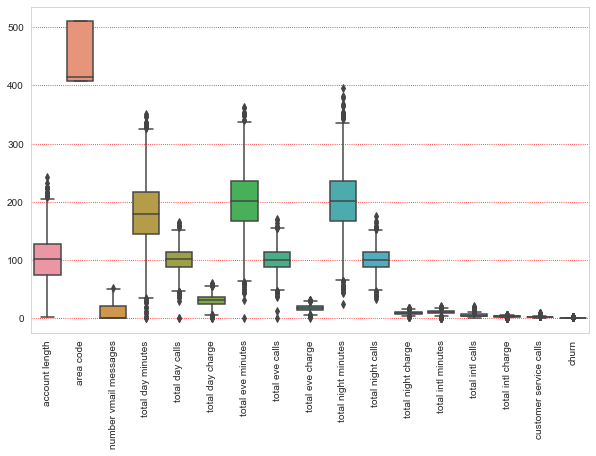

In [298]:
# Check for outliers.
plt.figure(figsize=(10,6))
sns.boxplot(data=SyriaTel_df)
plt.xticks(rotation=90)
plt.show()

In [299]:

SyriaTel_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# EDA (Eploratory Data Analysis)
Here we explore the dataset and see what it has. We will check the datatypes, the relationship, etc.


Check Categorical features and Continuos features

In [300]:
# SyriaTel_df.info()
SyriaTel_df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


From the data, we can get the categorical and numerical columns:



**Categorical Features:**
* **state:** the state the customer lives in
* **area code**: the area code of the customer
* **international plan**: true if the customer has the international plan, otherwise false
* **voice mail plan**: true if the customer has the voice mail plan, otherwise false

**Continuous Features:**
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

Select the dependent and independent features

The 'churn' shows if a customer is leaving the telco, so it will be the target feature

The rest will be used to determine the 'churn' hence the...

In [301]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation = 90)


Adding a function for plotting graphs esp. countplot

In [302]:
def plot_graph(size, type, title, xlabel, ylabel, data, column, hue):

    # Add the figure size
    plt.figure(figsize=size)

    # Loop through to check grapgh type
    if type =='countplot':

        # Plot the graph
        sns.countplot(data=data, x=column, hue=hue, order = data[column].value_counts().index)

        # Set plot style
        sns.set_style("whitegrid",{'grid.color': 'red','grid.linestyle': ':'})

    # Add title, labels and xticks rotation
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

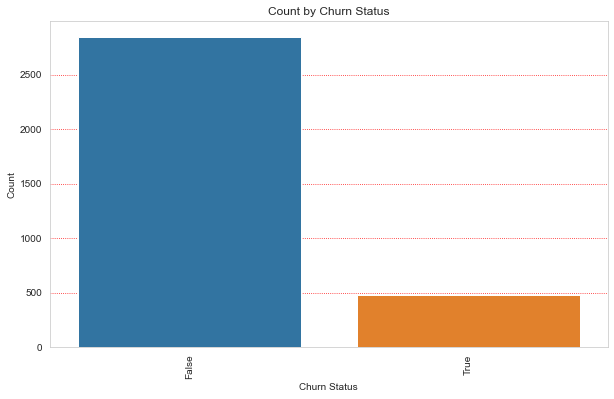

In [ ]:
plot_graph(size=(10,6), type='countplot', title='Count by Churn Status', xlabel='Churn Status',
            ylabel='Count', data=SyriaTel_df, column='churn', hue=None)

In [304]:
#Get % of the customers who have churned
# churned_cust = len(SyriaTel_df.loc[SyriaTel_df['churn'] == True])
churned_cust = len(SyriaTel_df[SyriaTel_df['churn'] == True])
nonchurned_cust = len(SyriaTel_df[SyriaTel_df['churn'] == False])

# Calculate percentage of customers who have and have not churned
churned_cust_perc = (churned_cust/len(SyriaTel_df))*100
nonchurned_cust_perc = (nonchurned_cust/len(SyriaTel_df))*100

print(f"Churned:", churned_cust_perc)
print(f"\nNon-Churned:", nonchurned_cust_perc)

Churned: 14.491449144914492

Non-Churned: 85.5085508550855


The customers who have churned are less than the ones who haven't thus about $14.5$% of the customers have churned remaining with $85.5$%.

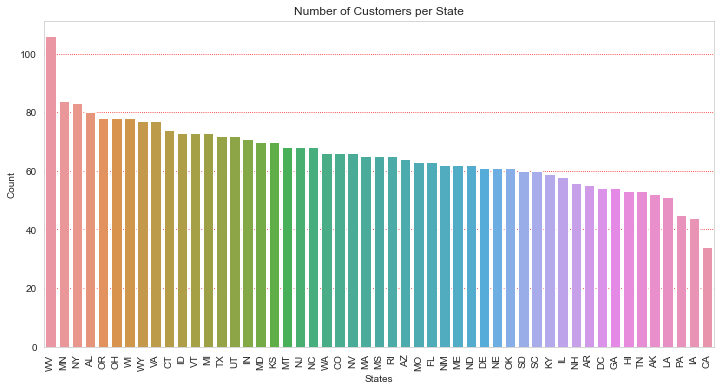

In [305]:
#Plot a graph for the state
plot_graph(size=(12,6), type="countplot", title="Number of Customers per State", 
           xlabel="States", ylabel="Count", data=SyriaTel_df, column="state", hue=None)



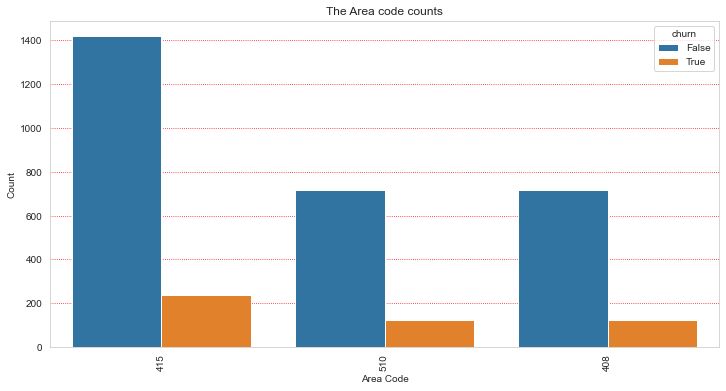

In [ ]:
# Plot area code
plot_graph(size=(12,6), type="countplot", title="The Area code counts", xlabel="Area Code", 
           ylabel="Count", data=SyriaTel_df, column="area code", hue="churn")

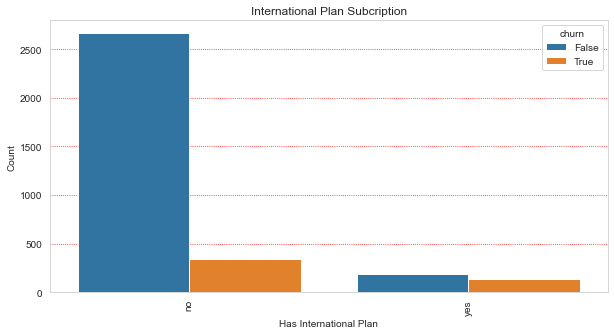

In [307]:
# Plot international plan
plot_graph(size=(10,5), type="countplot", title="International Plan Subcription", xlabel="Has International Plan",
            ylabel="Count", data=SyriaTel_df, column="international plan", hue="churn")


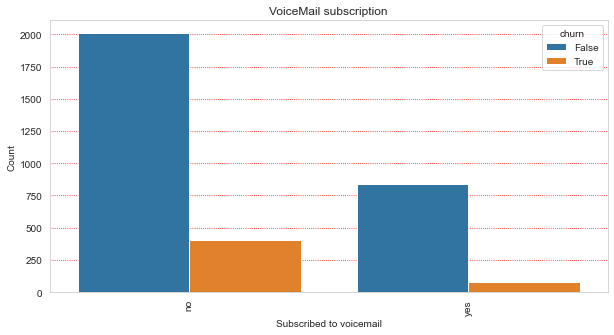

In [308]:
# Plot voicemail plan
plot_graph(size=(10,5), type="countplot", title="VoiceMail subscription", xlabel="Subscribed to voicemail", 
           ylabel="Count", data=SyriaTel_df, column="voice mail plan", hue="churn")

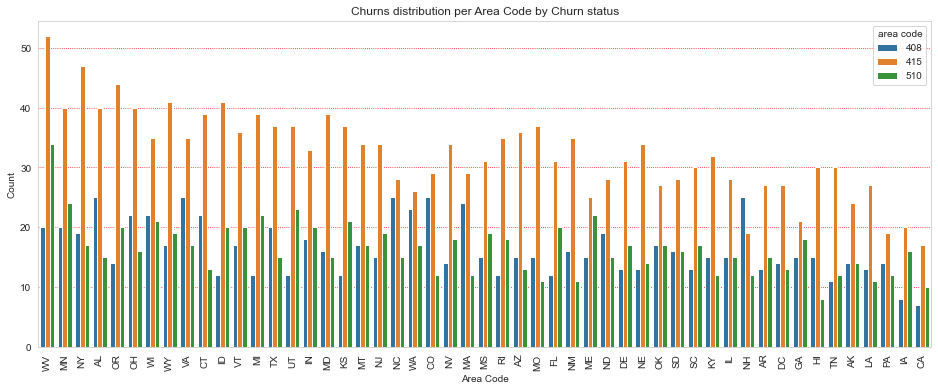

In [ ]:
# Plot the graph using the plot_graph function
plot_graph(size=(16,6), type="countplot", title="Churns distribution per Area Code by Churn status", 
           xlabel="Area Code", ylabel="Count", data=SyriaTel_df, column="state", hue='area code')

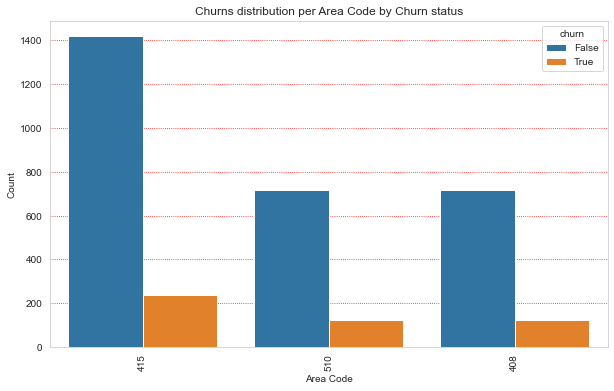

In [310]:
plot_graph(size=(10,6), type="countplot", data=SyriaTel_df, 
            title="Churns distribution per Area Code by Churn status", 
            xlabel="Area Code", ylabel="Count", column="area code", hue="churn")

In [325]:
# % of customers who have churned per area code

# Get number of customers who have and not churned in area 415
churned_cust_area415 = len(SyriaTel_df[(SyriaTel_df['area code'] == 415) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area415 = len(SyriaTel_df[(SyriaTel_df['area code'] == 415) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area415_perc = (churned_cust_area415/len(SyriaTel_df['area code']))*100 
nonchurned_cust_area415_perc = (nonchurned_cust_area415/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 415
nonchurned_cust_area415_PerArea_perc = (nonchurned_cust_area415/len(SyriaTel_df[(SyriaTel_df['area code'] == 415)]))*100 #8 85.74%

# Get number of customers who have and not churned in area 510
churned_cust_area510 = len(SyriaTel_df[(SyriaTel_df['area code'] == 510) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area510 = len(SyriaTel_df[(SyriaTel_df['area code'] == 510) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area510_perc = (churned_cust_area510/len(SyriaTel_df['area code']))*100
nonchurned_cust_area510_perc = (nonchurned_cust_area510/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 510
nonchurned_cust_area510_PerArea_perc = (nonchurned_cust_area510/len(SyriaTel_df[(SyriaTel_df['area code'] == 510)]))*100 #85.11%

# Get number of customers who have and not churned in area 408
churned_cust_area408 = len(SyriaTel_df[(SyriaTel_df['area code'] == 408) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area408 = len(SyriaTel_df[(SyriaTel_df['area code'] == 408) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area408_perc = (churned_cust_area408/len(SyriaTel_df['area code']))*100
nonchurned_cust_area408_perc = (nonchurned_cust_area408/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 408
nonchurned_cust_area408_PerArea_perc = (nonchurned_cust_area408/len(SyriaTel_df[(SyriaTel_df['area code'] == 408)]))*100 #85.44%


In [326]:
print(f"Churned percentage for Area 415:", churned_cust_area415_perc)
print(f"Non-Churned for Area 415:", nonchurned_cust_area415_perc)
print(f"Non-Churned as Per Area - Area 415:", nonchurned_cust_area415_PerArea_perc)

print(f"\nChurned percentage for Area 510:", churned_cust_area510_perc)
print(f"Non-Churned for Area 510:", nonchurned_cust_area510_perc)
print(f"Non-Churned as Per Area - Area 510:", nonchurned_cust_area510_PerArea_perc)

print(f"\nChurned percentage for Area 408:", churned_cust_area408_perc)
print(f"Non-Churned for Area 408:", nonchurned_cust_area408_perc)
print(f"Non-Churned as Per Area - Area 408:", nonchurned_cust_area408_PerArea_perc)

Churned percentage for Area 415: 7.080708070807081
Non-Churned for Area 415: 42.57425742574257
Non-Churned as Per Area - Area 415: 85.74018126888218

Churned percentage for Area 510: 3.7503750375037503
Non-Churned for Area 510: 21.45214521452145
Non-Churned as Per Area - Area 510: 85.11904761904762

Churned percentage for Area 408: 3.6603660366036608
Non-Churned for Area 408: 21.482148214821482
Non-Churned as Per Area - Area 408: 85.44152744630071


**Findings**:
1. From the graph above, each state had all the 3 area code.
2. Area 415 has the highest number of customers and the highest number of customers who have churned
3. Averagely, about $85$% of the customers have not churned

### Churns Per State

Let us check the churn status per state

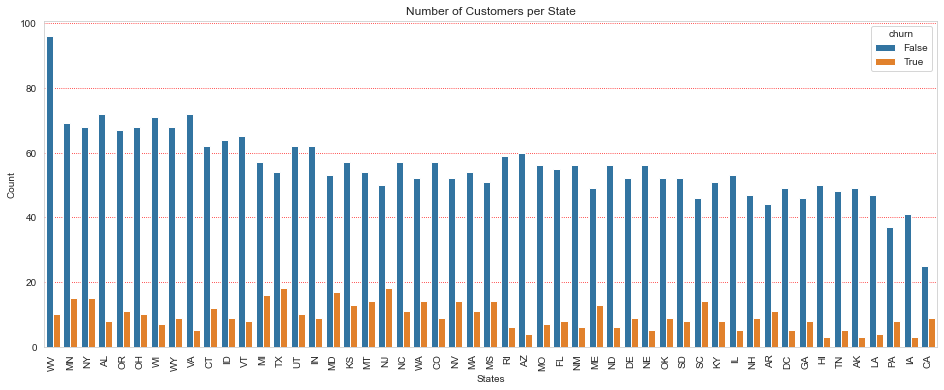

In [312]:
# Create a graph of Churn per state using the plot_graph function
plot_graph(size=(16,6), type="countplot", title="Number of Customers per State", 
           xlabel="States", ylabel="Count", data=SyriaTel_df, column="state", hue="churn")

Findings:

1. The customers who want to churn are less in number as opposed to those who don't want to churn
2. The TX and NJ states have the highest churn
3. The WV state has the highest number of customers who don't want to churn

### Statistical Tests
#### Chi-Square Test (for Categorical Features):

A p-value is below 0.05, the feature is significantly associated with churn

In [324]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(SyriaTel_df['state'], SyriaTel_df['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}, P-Value: {p}")

Chi-Square Value: 83.04379191019663, P-Value: 0.002296221552011188


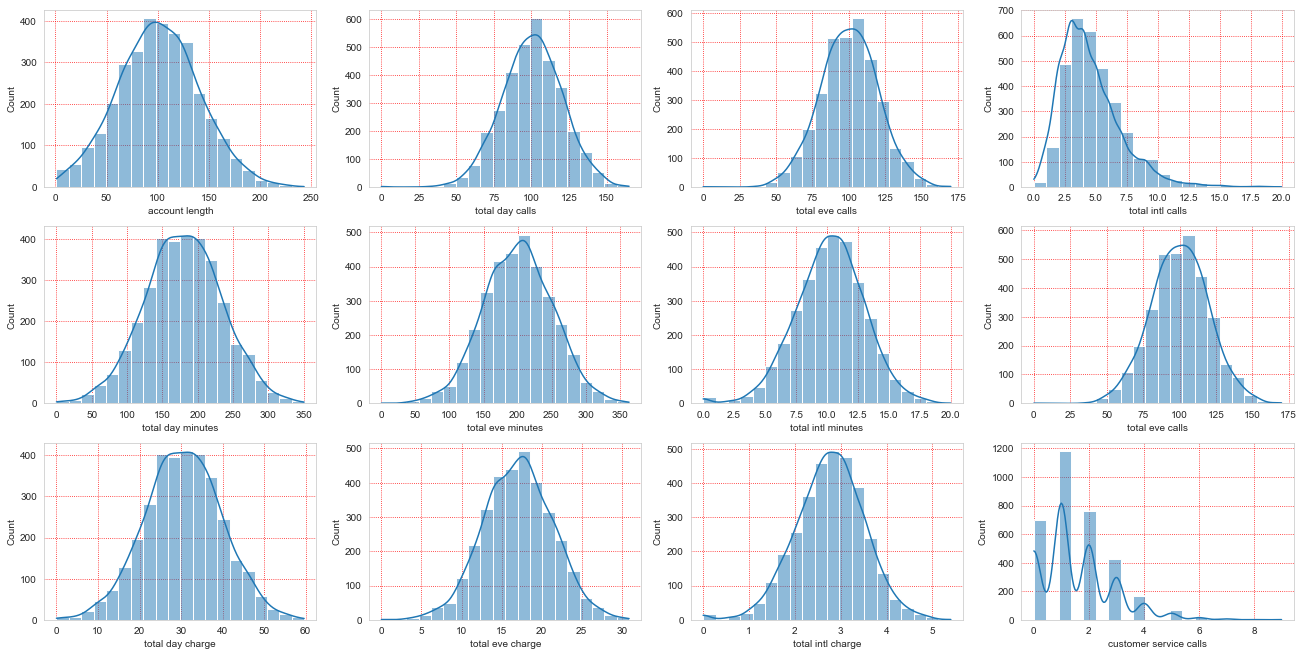

In [313]:
# Create a varible with a list of the numerical columns
numerical_df = SyriaTel_df[["account length", "number vmail messages", "total day minutes", "total day calls", 
                   "total day charge", "total eve minutes","total eve calls","total eve charge", 
                   "total night minutes", "total night calls","total night charge", "total intl minutes", "total intl calls",
                     "total intl charge", "customer service calls", "churn"]]

# Initialize a figure and axes of the graph containing 3 rows and 4 columns for 12 graph as subplots
fig, axes = plt.subplots(3,4, figsize=(18,9), constrained_layout = True)# sharey=True,

# Plt histograms for specific columns to check their shapes
sns.histplot(numerical_df['account length'], bins=20, ax=axes[0,0], kde=True)
sns.histplot(numerical_df["total day calls"], bins=20, ax=axes[0,1], kde=True)
sns.histplot(numerical_df["total eve calls"], bins=20, ax=axes[0,2], kde=True)
sns.histplot(numerical_df["total intl calls"], bins=20, ax=axes[0,3], kde=True)#
sns.histplot(numerical_df["total day minutes"], bins=20, ax=axes[1,0], kde=True)
sns.histplot(numerical_df["total eve minutes"], bins=20, ax=axes[1,1], kde=True)
sns.histplot(numerical_df["total intl minutes"], bins=20, ax=axes[1,2], kde=True)
sns.histplot(numerical_df["total eve calls"], bins=20, ax=axes[1,3], kde=True)
sns.histplot(numerical_df["total day charge"], bins=20, ax=axes[2,0], kde=True)
sns.histplot(numerical_df["total eve charge"], bins=20, ax=axes[2,1], kde=True)
sns.histplot(numerical_df["total intl charge"], bins=20, ax=axes[2,2], kde=True)
# sns.histplot(numerical_df["number vmail messages"], bins=20, ax=axes[2,3])
sns.histplot(numerical_df["customer service calls"], bins=20, ax=axes[2,3], kde=True)
plt.show()

Findings:
1. All the numerical values are normally distributed apart from the '*customer service calls*' which has several peaks. This may be because the '*customer service calls*' are ordinal numbers, not continuos.
2. The '*total intl calls*' is skewed to the left but it is normally distributed

Let us have a pairplot for numerical features to check the relationships

In [314]:
# # A pairplot to show the relationship

# # Create a pairplot using seaborn
# sns.pairplot(numerical_df, hue="churn", height=2.5)
# plt.show()

From the pairplot, Some have a perfect linear relationships such as the 'minutes' and 'charge' whether for day, evening or night. Most of the features are related but not having a linear relationships. 

**Correlation Heatmap for Numeric Features**

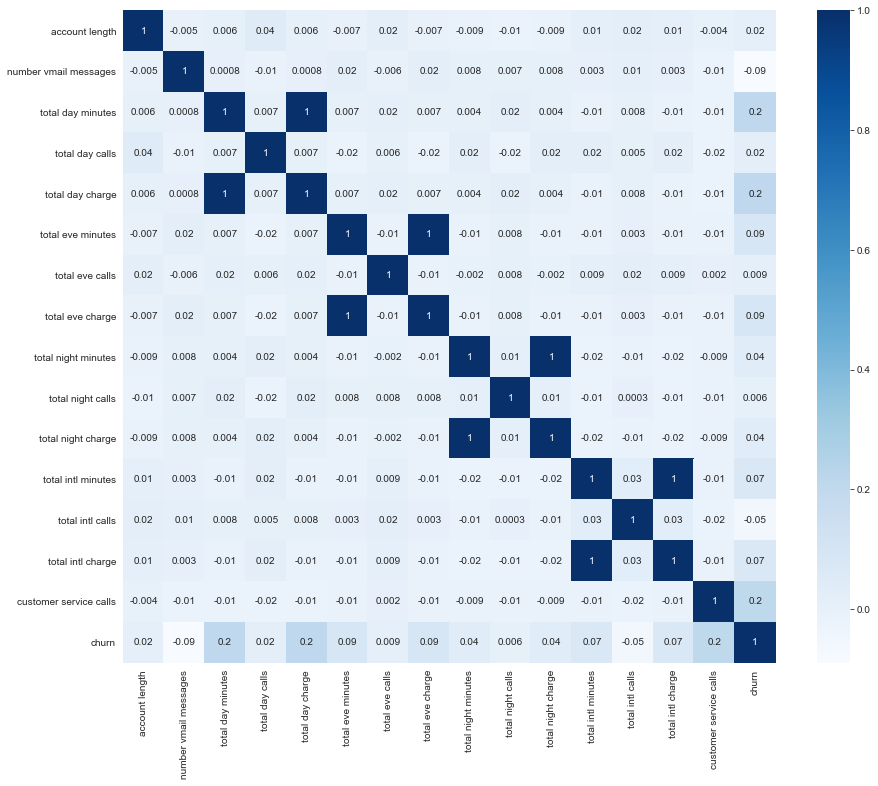

In [315]:
# Calculate correlation for all the numerical variables
corr_mat = numerical_df.corr()

# Create a plot of size 12 by 8
plt.subplots(figsize=(15,12))

# Create a heatmap using seaborn
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True, fmt='.0g', linecolor="blue")

# Make the X and Y labels to rotate 90 and 0 degrees respectively
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

**Observations**

Majority of the features are not correlated but there others with perfect correlations:
1. 'total day minutes' vs 'total day charge' 
2. 'total eve minutes' vs 'total eve charge' 
3. 'total night minutes' vs 'total night charge' 
4. 'total intl minutes' vs 'total intl charge' 

A high correlation may lead to multicolinearity which may complicate regression analysis. This will make it difficult to determine the individual effects of each independent variable on the dependent varaible. So we will drop them.

In [316]:
# Create a variable containing columns to drop
columns_to_drop = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Create a new Dataframe without the dropped columns
SyriaTel_df_new = SyriaTel_df.drop(columns=columns_to_drop)
SyriaTel_df_new.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.7,1,False
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.7,1,False


### Train test split
The train test split

In [317]:
# Split the data to train and test data

# Define the target and predictor columns
y = SyriaTel_df_new["churn"]
X = SyriaTel_df_new.drop(columns="churn", axis=1)

# Check top 5 rows to confirm
X.head()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# y_test

Since we will be using numerical data in the analysis, we will transform our target column $churn$ to a numerical dtype i.e. make True & False to $0s$ and $1s$

In [318]:
# Convert Boolean to 0s and 1s in both training and test sets

# Convert the churn (y_train and y_test) data to 0s and 1s
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Check the unique values and their counts
print(f"y_train:\n", y_train.value_counts())
print(f"y_test:\n", y_test.value_counts())

y_train:
 0    2284
1     382
Name: churn, dtype: int64
y_test:
 0    566
1    101
Name: churn, dtype: int64


In [319]:
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
817,UT,243,510,no,no,0,92,16.24,63,13.91,118,11.89,6,1.78,2
1373,SC,108,415,no,no,0,105,19.04,110,16.46,93,9.40,4,1.11,4
679,TX,75,415,yes,no,0,78,37.81,111,27.80,104,9.36,9,2.35,1
56,CO,141,415,no,no,0,98,21.57,62,15.30,128,6.34,2,2.16,1
1993,IN,86,510,no,no,0,96,36.77,77,22.64,110,9.63,3,1.22,0


## Transformation

Now, let us transform the categorical values to $0s$ and $1s$ so as to enable analysis

In [320]:
# Use the get_dimmies method to encode the categorical X_train data

# Encode the 'state' column
state_dummy_df = pd.get_dummies(X_train["state"], dtype=np.int64, prefix="state_")
state_dummy_testdf = pd.get_dummies(X_test["state"], dtype=np.int64, prefix="state_")
# state_dummy_df

# Encode the 'area code' column
area_code_dummy_df = pd.get_dummies(X_train["area code"],dtype=np.int64, prefix="area_code_is")
area_code_dummy_testdf = pd.get_dummies(X_test["area code"],dtype=np.int64, prefix="area_code_is")

# Encode the 'international plan' column
international_plan_dummy_df = pd.get_dummies(X_train["international plan"],dtype=np.int64,
                                             drop_first = True, prefix="international_plan_",)
international_plan_dummy_testdf = pd.get_dummies(X_test["international plan"],dtype=np.int64,
                                             drop_first = True, prefix="international_plan_",)
# Encode the 'voice mail plan' column
voice_mail_plan_dummy_df = pd.get_dummies(X_train["voice mail plan"], dtype=np.int64, 
                                          drop_first = True, prefix="voice_mail_plan_is")
voice_mail_plan_dummy_testdf = pd.get_dummies(X_test["voice mail plan"], dtype=np.int64, 
                                          drop_first = True, prefix="voice_mail_plan_is")

# Join the new encoded columns together
X_train = pd.concat([X_train, state_dummy_df, area_code_dummy_df, international_plan_dummy_df,
                             voice_mail_plan_dummy_df], axis=1)
X_test = pd.concat([X_test, state_dummy_testdf, area_code_dummy_testdf, international_plan_dummy_testdf,
                             voice_mail_plan_dummy_testdf], axis=1)
# Exclude duplicates
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

# Drop old columns that have been encoded
X_train = X_train.drop(['state','area code','international plan','voice mail plan'],axis=1)
X_test = X_test.drop(['state','area code','international plan','voice mail plan'],axis=1)

# Check the top 5 rows
# X_train.head()
X_test.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state__VT,state__WA,state__WI,state__WV,state__WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan__yes,voice_mail_plan_is_yes
438,113,0,93,26.35,106,28.10,123,8.52,3,3.65,...,0,0,0,0,1,0,0,1,0,0
2674,67,0,117,18.55,124,18.48,141,8.48,6,3.46,...,0,0,0,0,0,0,1,0,0,0
1345,98,0,0,0.00,130,13.57,88,7.52,1,1.84,...,0,0,0,0,0,0,1,0,0,0
1957,147,0,79,36.18,91,17.35,113,7.03,2,2.75,...,0,0,0,0,0,1,0,0,0,0
2148,96,0,102,24.48,73,19.10,91,10.25,7,2.70,...,0,0,0,0,1,1,0,0,0,0


In [322]:
# def get_dummy(data, column, dtype, prefix):
#     dummy_data = pd.get_dummies(data[column], dtype=dtype, prefix=prefix)
#     return dummy_data

# # Encode the 'state' column
# state_dummy_df1 = get_dummy(data=X_train, column="state", dtype=np.int64, prefix="state_") #pd.get_dummies(X_train["state"], dtype=np.int64, prefix="state_")
# state_dummy_df1

Apply SMOTE to balance the distribution

In [358]:
# use SMOTE to balance the data distribution

# Declare variable sm for SMOTE function
sm = SMOTE(k_neighbors=5, random_state=42)

# 
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_sm.shape))

Before OverSampling, the shape of X_train: (2666, 67)
Before OverSampling, the shape of y_train: (2666,)
After OverSampling, the shape of X_train_over: (4568, 67)
After OverSampling, the shape of y_train_over: (4568,)


### Data Normalization/Scaling

All the values above are now numerical but we have 'small' values and 'large' values. To have starndard data for use, we normalize the values to be within the same range.

Therefore we will use a MinMaxScaler

In [343]:
# Declare the standard scale function
scaler = MinMaxScaler()

# Fit and transform all the columns and put in a dataframe
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_sm), index=X_train_sm.index, columns=X_train_sm.columns)

# Check the top 5 rows
X_train_scaled


,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state__VT,state__WA,state__WI,state__WV,state__WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan__yes,voice_mail_plan_is_yes
0,1.000000,0.000000,0.459259,0.266892,0.370588,0.450016,0.598592,0.648536,0.315789,0.329630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.442149,0.000000,0.555556,0.314189,0.647059,0.532514,0.422535,0.499701,0.210526,0.205556,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.305785,0.000000,0.355556,0.631250,0.652941,0.899385,0.500000,0.497310,0.473684,0.435185,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.578512,0.000000,0.503704,0.356926,0.364706,0.494985,0.669014,0.316796,0.105263,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.351240,0.000000,0.488889,0.613682,0.452941,0.732449,0.542254,0.513449,0.157895,0.225926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.537190,0.686275,0.540741,0.633811,0.735294,0.502067,0.478873,0.621750,0.263158,0.523523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4564,0.508264,0.000000,0.592593,0.470386,0.588235,0.489178,0.718310,0.426717,0.105263,0.414915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4565,0.347107,0.000000,0.607407,0.877915,0.647059,0.471354,0.429577,0.460860,0.105263,0.356976,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4566,0.768595,0.000000,0.755556,0.428340,0.464706,0.508778,0.598592,0.596435,0.105263,0.586268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

* We will use the Linear Regression model as the base model

* Decision Trees Regression

* Random Forest Regression

The Scores to check are:
* Accuracy score , acc
* F1-Score

## Base Model: Linear Regression Model

Train the Linear Rgression Model:

In [345]:
# Create a linearRegression function t fit and predict the y values

#Create a variable for the Linear Regression function
Lr = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')#, random_state=42)

# Fit the data to model
Lr_model = Lr.fit(X_train_sm, y_train_sm)

# # Predict y values
y_pred_Lr = Lr.predict(X_test) 

Evaluate Model:

In [346]:
print(f"Linear Regression acc score:", accuracy_score(y_test, y_pred_Lr))
print(f"Linear Regression f1_score:", f1_score(y_test, y_pred_Lr))
print(f"Linear Regression roc_auc_score:", roc_auc_score(y_test, y_pred_Lr))

Linear Regression acc score: 0.8590704647676162
Linear Regression f1_score: 0.32857142857142857
Linear Regression roc_auc_score: 0.5997271105202393


In [347]:
print(classification_report(y_test, y_pred_Lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       566
           1       0.59      0.23      0.33       101

    accuracy                           0.86       667
   macro avg       0.73      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



**Findings:**

The base Model has an accuracy score of $85$%. 

It indicates that the model will always predict $33$% of the time

### Feature Importance



In [348]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Coefficients
# feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_[0]})
# print(feature_importance.sort_values(by='Importance', ascending=False))

## Model 2: Decision Tree

In [349]:
# Create a decision tree model, fit and predict

# Decision tree variable
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(X_train_sm,y_train_sm)

#Prdict
y_pred_dt = decision_tree.predict(X_test)

In [350]:
print(f"Decision Tree acc score:", accuracy_score(y_test, y_pred_dt))
print(f"Decision Tree  f1_score:", f1_score(y_test, y_pred_dt))
print(f"Decision Tree  roc_auc_score:", roc_auc_score(y_test, y_pred_dt))

Decision Tree acc score: 0.8695652173913043
Decision Tree  f1_score: 0.6359832635983264
Decision Tree  roc_auc_score: 0.8214673057411748


In [351]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       566
           1       0.55      0.75      0.64       101

    accuracy                           0.87       667
   macro avg       0.75      0.82      0.78       667
weighted avg       0.89      0.87      0.88       667



**Findings:**

The Decision Tree Model has an accuracy score of $86$%. 

The model will always predict about $64$% of the time.

### Feature Selection


In [352]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Feature importance
# importances = model.feature_importances_
# feature_names = X_train.columns
# feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# print(feature_importance.sort_values(by='Importance', ascending=False))

## Model 3: Random Forest Model

In [353]:
# Create a Random Forest Model, Fit and predict

# Create the Random Forest functio variable
rf_model = RandomForestClassifier() 

#F Fit the model
rf_model.fit(X_train_sm,y_train_sm) 

# Do prediction of y values
y_pred_rf = rf_model.predict(X_test)

In [359]:
print(f"Random Forest acc score:", accuracy_score(y_test, y_pred_rf))
print(f"Random Forest  f1_score:", f1_score(y_test, y_pred_rf))
print(f"Random Forest  roc_auc_score:", roc_auc_score(y_test, y_pred_rf))

Random Forest acc score: 0.9250374812593704
Random Forest  f1_score: 0.7222222222222223
Random Forest  roc_auc_score: 0.8094146870517441


In [360]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.82      0.64      0.72       101

    accuracy                           0.93       667
   macro avg       0.88      0.81      0.84       667
weighted avg       0.92      0.93      0.92       667



**Findings:**

The Random Forest Model has an accuracy score of $93$%. 

 An f1_score of $0.69$ indicates that the model will always correctly predict about $72$% of the time

### Other Feature selection mthds
Recursive Feature Elimination (RFE): Iteratively remove less important features to identify those most relevant.

In [356]:
# from sklearn.feature_selection import RFE

# selector = RFE(estimator=model, n_features_to_select=5)
# selector.fit(X_train, y_train)
# print("Selected Features:", X_train.columns[selector.support_])

## Model Comparison

In this comparison, we will use the ROC Curve to find out which model is better

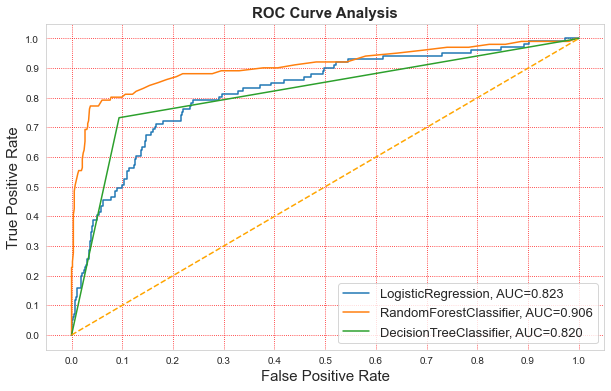

In [357]:

# Create a list of the models used
models = [LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a models
result_table = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in models:
    model = cls.fit(X_train_sm, y_train_sm)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the models as index labels
result_table.set_index('models', inplace=True)

fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**ROC Findings:**

The Random Forest has an AUC of 0.903 which is best performing model among the 3 models used. The Decision Tree and the Base Model, Linear Regression follow respectively.

Therefore, the recommended model to use will be of the Random Forest.

Further testing can be done to fine tune the model

## Conclusion